In [634]:
import pandas as pd

In [635]:
tweets = pd.read_csv('all_tweet_labeled.csv')

In [636]:
US = pd.read_csv('us_progress.csv')
CN = pd.read_csv('cn_progress.csv')

In [637]:
tweets.head(3)

,Unnamed: 0,Unnamed: 0.1,id,user_followers,date,text,hashtags,label
0,0,0,1340539111971516416,405,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],1
1,1,1,1338158543359250433,834,2020-12-13 16:27:13,while the world has been on the wrong side of ...,NaN,1
2,2,2,1337858199140118533,10,2020-12-12 20:33:45,# coronavirus # sputnikv # astrazeneca # pfize...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",1


In [638]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle


# Plotly
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [639]:
def convert_date(df):   
    df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(0)
    return df

US = convert_date(US)
CN = convert_date(CN)

US

,Unnamed: 0,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,50317,USA,2020-12-20,556208.0,556208.0,0.0,0.0,0.0,0.17,0.17,0.00,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
1,50318,USA,2020-12-21,614117.0,614117.0,0.0,57909.0,57909.0,0.18,0.18,0.00,172.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
2,50319,USA,2020-12-22,0.0,0.0,0.0,0.0,127432.0,0.00,0.00,0.00,379.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
3,50320,USA,2020-12-23,1008025.0,1008025.0,0.0,0.0,150606.0,0.30,0.30,0.00,448.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
4,50321,USA,2020-12-24,0.0,0.0,0.0,0.0,191001.0,0.00,0.00,0.00,568.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,50619,USA,2021-10-18,408797942.0,218973123.0,189292559.0,531983.0,829568.0,121.55,65.11,56.28,2467.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
303,50620,USA,2021-10-19,409438987.0,219161368.0,189487793.0,641045.0,837452.0,121.74,65.16,56.34,2490.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
304,50621,USA,2021-10-20,410189737.0,219381466.0,189709710.0,750750.0,831213.0,121.96,65.23,56.41,2471.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
305,50622,USA,2021-10-21,411010650.0,219624445.0,189924447.0,820913.0,795156.0,122.21,65.30,56.47,2364.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech"


In [666]:
US['people_vaccinated'].replace(0, np.nan, inplace=True)
US['people_vaccinated'].interpolate(inplace=True)
US['people_vaccinated_daily'] = US['people_vaccinated'].diff()

US['people_vaccinated_per_hundred'].replace(0, np.nan, inplace=True)
US['people_vaccinated_per_hundred'].interpolate(inplace=True)
US['people_vaccinated_per_hundred_daily'] = US['people_vaccinated_per_hundred'].diff()

US['people_fully_vaccinated'].replace(0, np.nan, inplace=True)
US['people_fully_vaccinated'].interpolate(inplace=True)
US['people_fully_vaccinated_daily'] = US['people_fully_vaccinated'].diff()
US

,Unnamed: 0,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,people_vaccinated_daily,people_vaccinated_per_hundred_daily,people_fully_vaccinated_daily
0,50317,USA,2020-12-20,556208.0,5.562080e+05,NaN,0.0,0.0,0.17,0.170000,0.00,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN,NaN
1,50318,USA,2020-12-21,614117.0,6.141170e+05,NaN,57909.0,57909.0,0.18,0.180000,0.00,172.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",57909.000000,0.010000,NaN
2,50319,USA,2020-12-22,0.0,8.110710e+05,NaN,0.0,127432.0,0.00,0.240000,0.00,379.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",196954.000000,0.060000,NaN
3,50320,USA,2020-12-23,1008025.0,1.008025e+06,NaN,0.0,150606.0,0.30,0.300000,0.00,448.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",196954.000000,0.060000,NaN
4,50321,USA,2020-12-24,0.0,1.320212e+06,NaN,0.0,191001.0,0.00,0.393333,0.00,568.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",312186.666667,0.093333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,50619,USA,2021-10-18,408797942.0,2.189731e+08,189292559.0,531983.0,829568.0,121.55,65.110000,56.28,2467.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",167544.000000,0.050000,151078.0
303,50620,USA,2021-10-19,409438987.0,2.191614e+08,189487793.0,641045.0,837452.0,121.74,65.160000,56.34,2490.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",188245.000000,0.050000,195234.0
304,50621,USA,2021-10-20,410189737.0,2.193815e+08,189709710.0,750750.0,831213.0,121.96,65.230000,56.41,2471.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",220098.000000,0.070000,221917.0
305,50622,USA,2021-10-21,411010650.0,2.196244e+08,189924447.0,820913.0,795156.0,122.21,65.300000,56.47,2364.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",242979.000000,0.070000,214737.0


In [641]:
CN['people_vaccinated'].replace(0, np.nan, inplace=True)
CN['people_vaccinated'].interpolate(inplace=True)
CN['people_vaccinated_daily'] = CN['people_vaccinated'].diff()

CN['people_vaccinated_per_hundred'].replace(0, np.nan, inplace=True)
CN['people_vaccinated_per_hundred'].interpolate(inplace=True)
CN['people_vaccinated_per_hundred_daily'] = CN['people_vaccinated_per_hundred'].diff()

CN

,Unnamed: 0,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,people_vaccinated_daily,people_vaccinated_per_hundred_daily
0,9519,CHN,2020-12-15,1.500000e+06,NaN,0.0,0.0,0.0,0.10,NaN,0.0,0.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
1,9520,CHN,2020-12-16,0.000000e+00,NaN,0.0,0.0,187500.0,0.00,NaN,0.0,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
2,9521,CHN,2020-12-17,0.000000e+00,NaN,0.0,0.0,187500.0,0.00,NaN,0.0,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
3,9522,CHN,2020-12-18,0.000000e+00,NaN,0.0,0.0,187500.0,0.00,NaN,0.0,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
4,9523,CHN,2020-12-19,0.000000e+00,NaN,0.0,0.0,187500.0,0.00,NaN,0.0,130.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,9825,CHN,2021-10-17,2.232088e+09,1.100842e+09,0.0,1521000.0,1549000.0,154.55,76.22,0.0,1073.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",0.0,0.0
307,9826,CHN,2021-10-18,2.234096e+09,1.100842e+09,0.0,2008000.0,1632857.0,154.69,76.22,0.0,1131.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",0.0,0.0
308,9827,CHN,2021-10-19,2.236226e+09,1.100842e+09,0.0,2130000.0,1735000.0,154.84,76.22,0.0,1201.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",0.0,0.0
309,9828,CHN,2021-10-20,2.238325e+09,1.100842e+09,0.0,2099000.0,1831571.0,154.99,76.22,0.0,1268.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",0.0,0.0


In [667]:
def plot_vaccination_trend(df, feature, rolling=5):
    crossing1 = df[['date', feature]].groupby('date').sum()
    tseries = df.groupby(['date'])[feature].agg(
        ['sum']).reset_index().rename(columns={'sum': feature})

    tseries = tseries.set_index('date')

    fig = plt.subplots(figsize=(30, 15))

    g = sns.lineplot(x=tseries.index, y=feature,
                     data=tseries, label="Actual Time Series")

    rmean = crossing1.rolling(rolling, min_periods = 1, win_type='boxcar').mean()

    g = sns.lineplot(x=rmean.index, y=feature,
                     data=rmean, label=str(rolling) + " Days Rolling Mean")
    
    g.set_title('People Fully Vaccinated Daily', fontsize=20)
    g.set_xlabel('Date')
    g.set_ylabel('Vaccinations')
    plt.legend(fontsize='xx-large')
    plt.savefig('us_people_fully_vaccinated_daily.png', bbox_inches='tight')
    plt.show()
    return rmean

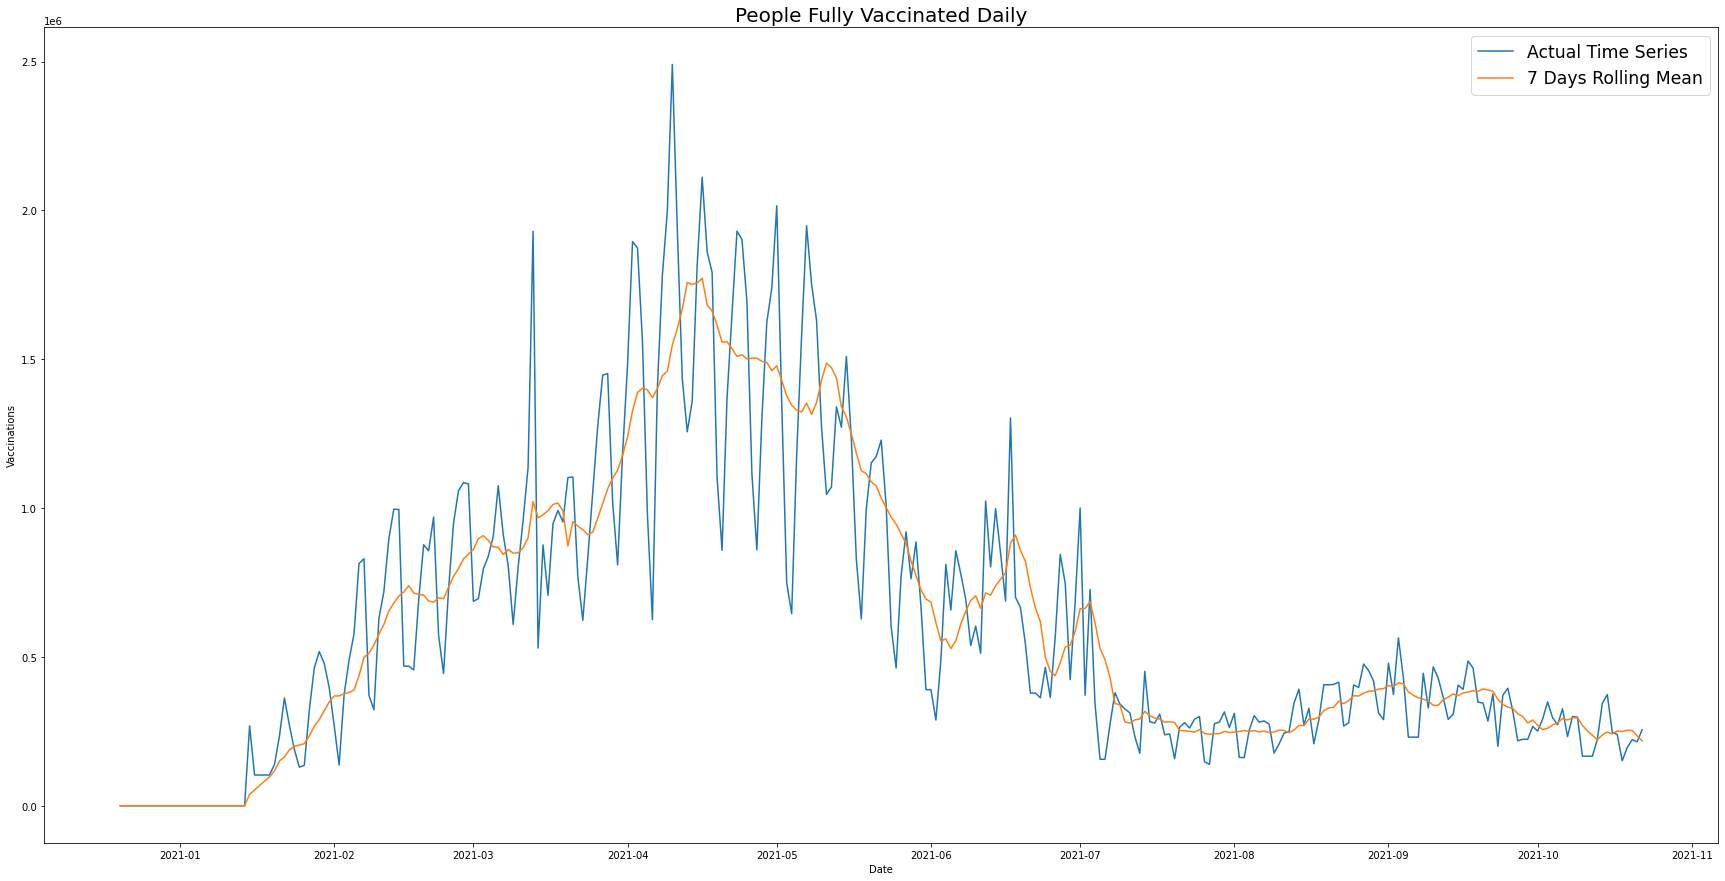

            people_fully_vaccinated_daily
date                                     
2020-12-20                       0.000000
2020-12-21                       0.000000
2020-12-22                       0.000000
2020-12-23                       0.000000
2020-12-24                       0.000000
...                                   ...
2021-10-18                  249168.952381
2021-10-19                  253280.571429
2021-10-20                  253164.428571
2021-10-21                  234671.428571
2021-10-22                  217765.285714

[307 rows x 1 columns]


In [668]:
FEATURE = 'people_fully_vaccinated_daily'
us_trend_rmean = plot_vaccination_trend(US, FEATURE, 7)
print(us_trend_rmean)

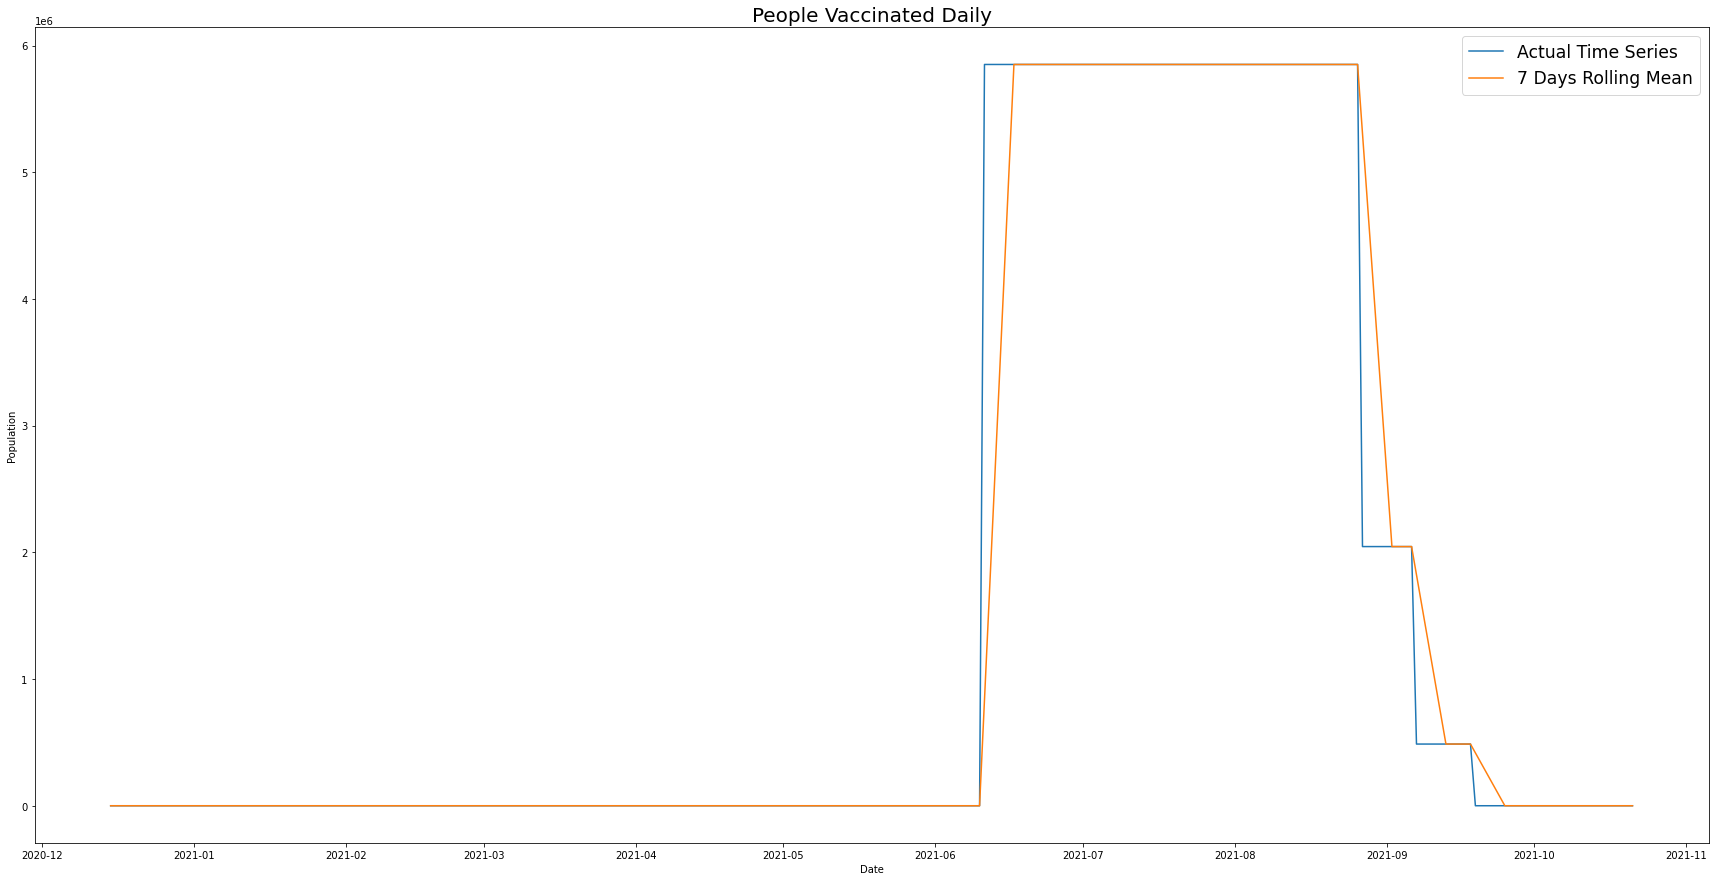

            people_vaccinated_daily
date                               
2020-12-15                      0.0
2020-12-16                      0.0
2020-12-17                      0.0
2020-12-18                      0.0
2020-12-19                      0.0
...                             ...
2021-10-17                      0.0
2021-10-18                      0.0
2021-10-19                      0.0
2021-10-20                      0.0
2021-10-21                      0.0

[311 rows x 1 columns]


In [644]:
FEATURE = 'people_vaccinated_daily'
cn_trend_rmean = plot_vaccination_trend(CN, FEATURE, 7)
print(cn_trend_rmean)

crossing1 = CN[['date', 'daily_vaccinations']].groupby('date').sum()
print(crossing1.head(20))
tseries = CN.groupby(['date'])['daily_vaccinations'].agg(
    ['sum']).reset_index().rename(columns={'sum': 'daily_vaccinations'})

tseries = tseries.set_index('date')

fig = plt.subplots(figsize=(30, 15))

g = sns.lineplot(x=tseries.index, y='daily_vaccinations',
                 data=tseries, label="Actual Time Series")

cn_trend_rmean = crossing1.rolling(5, min_periods = 1, win_type='triang').mean()

g = sns.lineplot(x=cn_trend_rmean.index, y='daily_vaccinations',
                 data=cn_trend_rmean, label="Rolling Mean")

plt.legend(fontsize='xx-large')
plt.show()

In [645]:
tweets['label'].value_counts()

1    163917
2     38630
0     10435
Name: label, dtype: int64

In [646]:

tweets["date"] = pd.to_datetime(tweets["date"], format = '%Y-%m-%d')
tweets.head()

,Unnamed: 0,Unnamed: 0.1,id,user_followers,date,text,hashtags,label
0,0,0,1340539111971516416,405,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],1
1,1,1,1338158543359250433,834,2020-12-13 16:27:13,while the world has been on the wrong side of ...,NaN,1
2,2,2,1337858199140118533,10,2020-12-12 20:33:45,# coronavirus # sputnikv # astrazeneca # pfize...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",1
3,3,3,1337855739918835717,49165,2020-12-12 20:23:59,"facts are immutable , senator , even when you ...",NaN,1
4,4,4,1337854064604966912,152,2020-12-12 20:17:19,explain to me again why we need a vaccine @ bo...,"['whereareallthesickpeople', 'PfizerBioNTech']",1


In [647]:
tweets['just_date'] = tweets['date'].dt.date
date_group = tweets[['just_date', 'text', 'label']].groupby('just_date')
sentiment_serie = date_group['label'].value_counts(normalize=False).unstack()
sentiment_serie_normalized = date_group['label'].value_counts(normalize=True).unstack()

In [648]:
sentiment_serie.to_csv('sentiment_serie.csv')

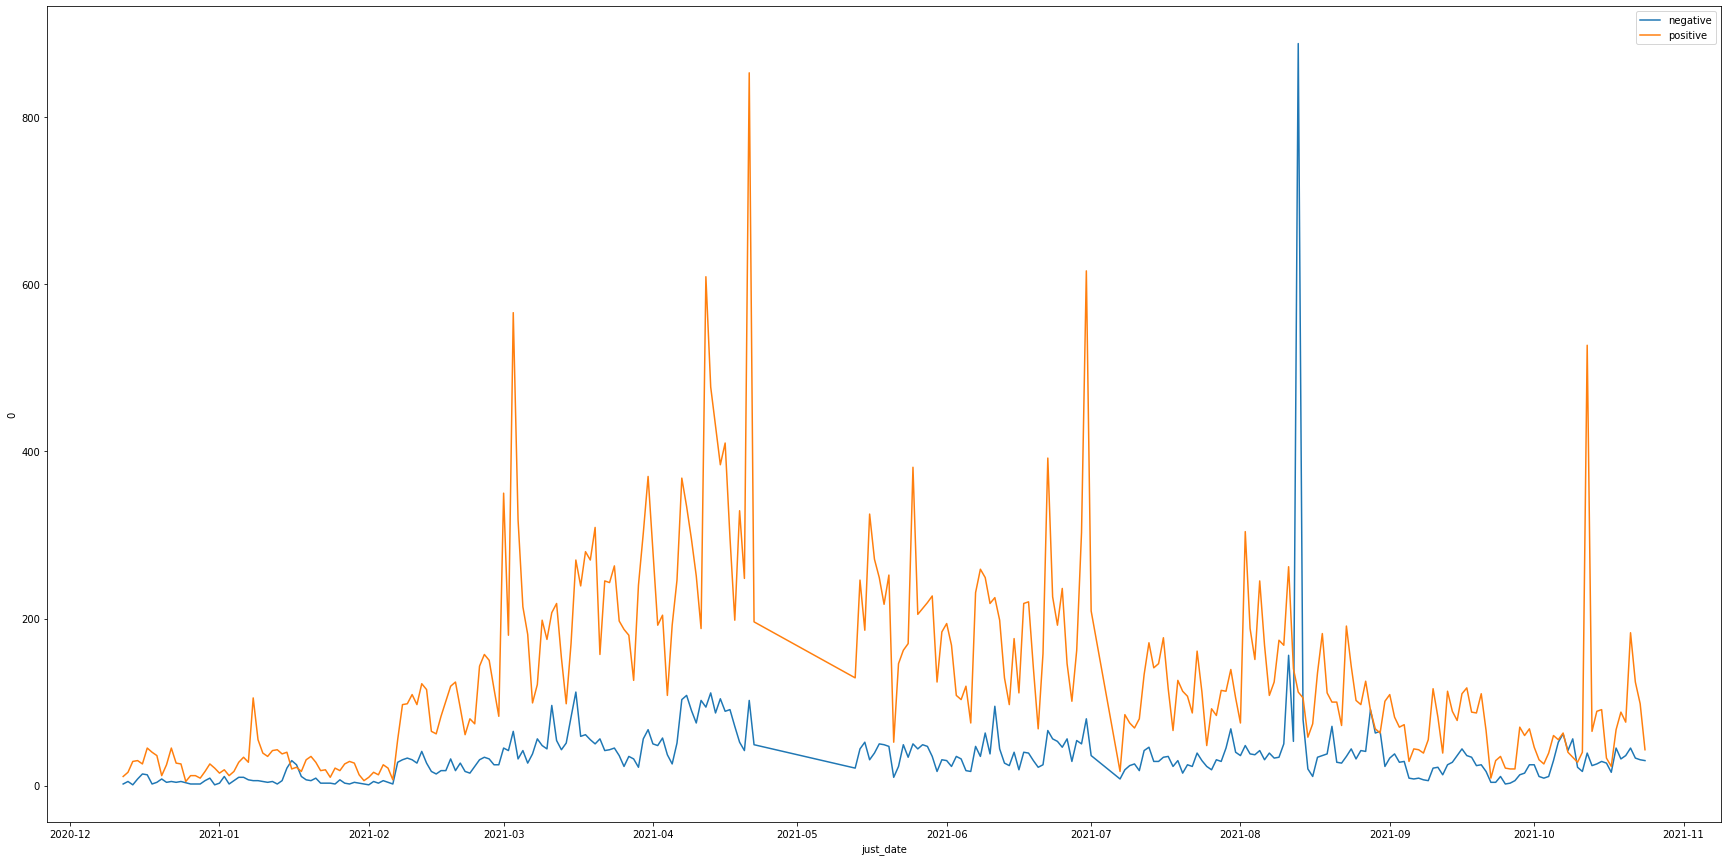

In [649]:
fig = plt.subplots(figsize=(30, 15))
g = sns.lineplot(x=sentiment_serie.index, y=0,
                 data=sentiment_serie, label="negative")
#g = sns.lineplot(x=sentiment_serie.index, y=1,
#                 data=sentiment_serie, label="neutral")
g = sns.lineplot(x=sentiment_serie.index, y=2,
                 data=sentiment_serie, label="positive")
plt.show()

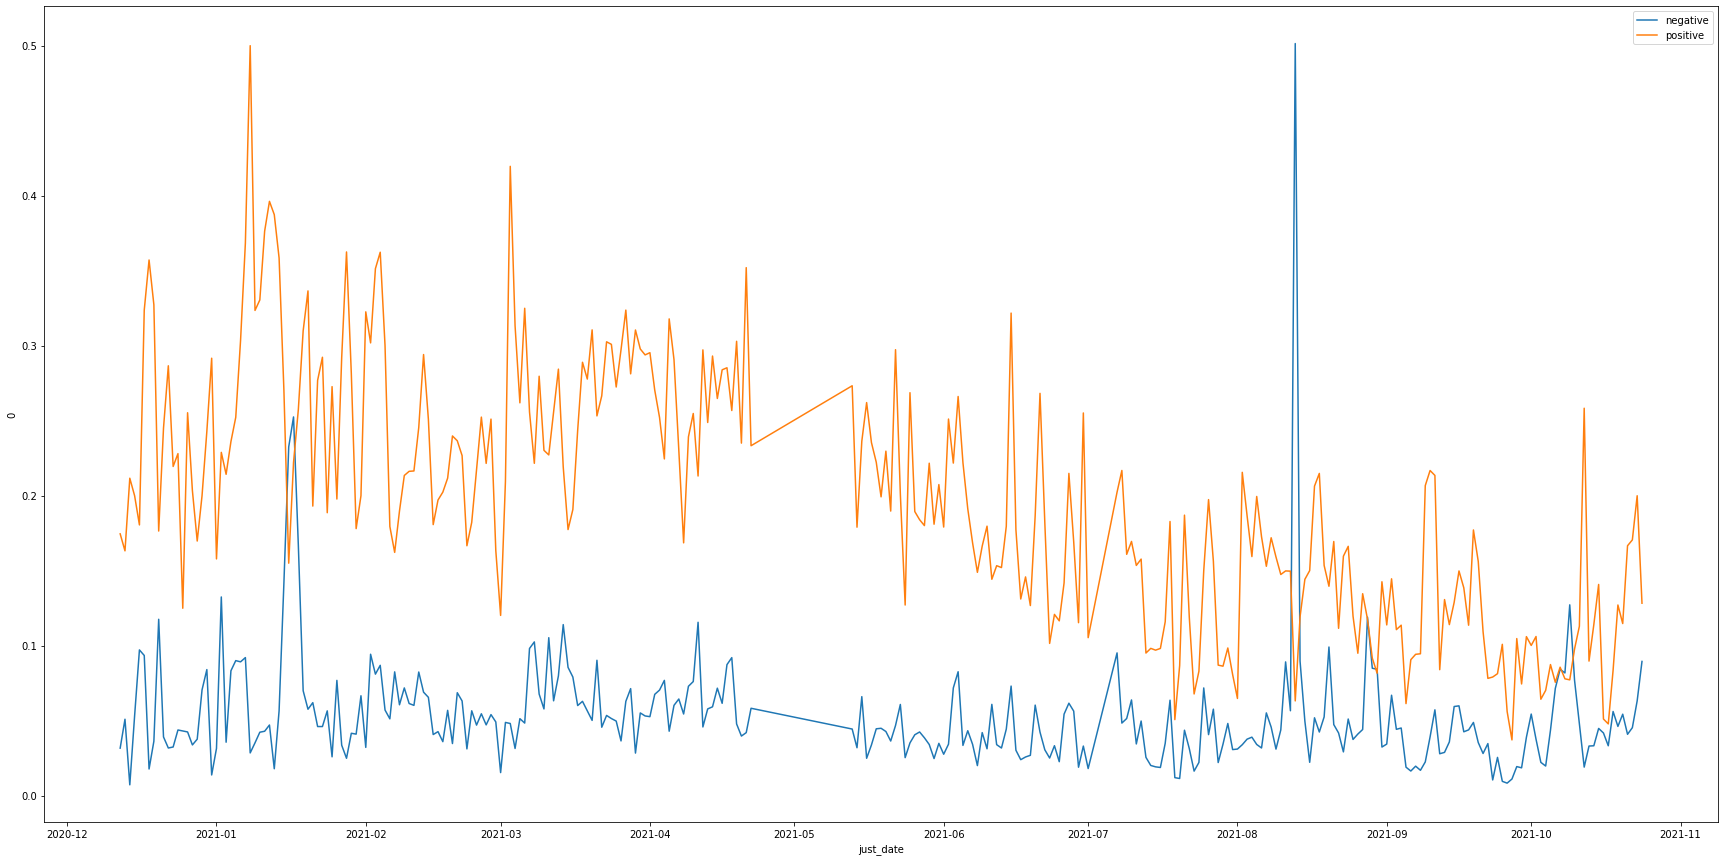

In [650]:
fig = plt.subplots(figsize=(30, 15))
g = sns.lineplot(x=sentiment_serie_normalized.index, y=0,
                 data=sentiment_serie_normalized, label="negative")
#g = sns.lineplot(x=sentiment_serie.index, y=1,
#                 data=sentiment_serie, label="neutral")
g = sns.lineplot(x=sentiment_serie_normalized.index, y=2,
                 data=sentiment_serie_normalized, label="positive")
plt.show()

label              0         1         2
just_date                               
2020-12-12  0.031746  0.793651  0.174603
2020-12-13  0.038171  0.791005  0.170824
2020-12-14  0.034096  0.788900  0.177003
2020-12-15  0.034798  0.784046  0.181157
2020-12-16  0.040393  0.775572  0.184036
...              ...       ...       ...
2021-10-20  0.043590  0.871344  0.085067
2021-10-21  0.046363  0.859931  0.093706
2021-10-22  0.047034  0.843284  0.109682
2021-10-23  0.048684  0.820250  0.131066
2021-10-24  0.051750  0.798931  0.149319

[292 rows x 3 columns]


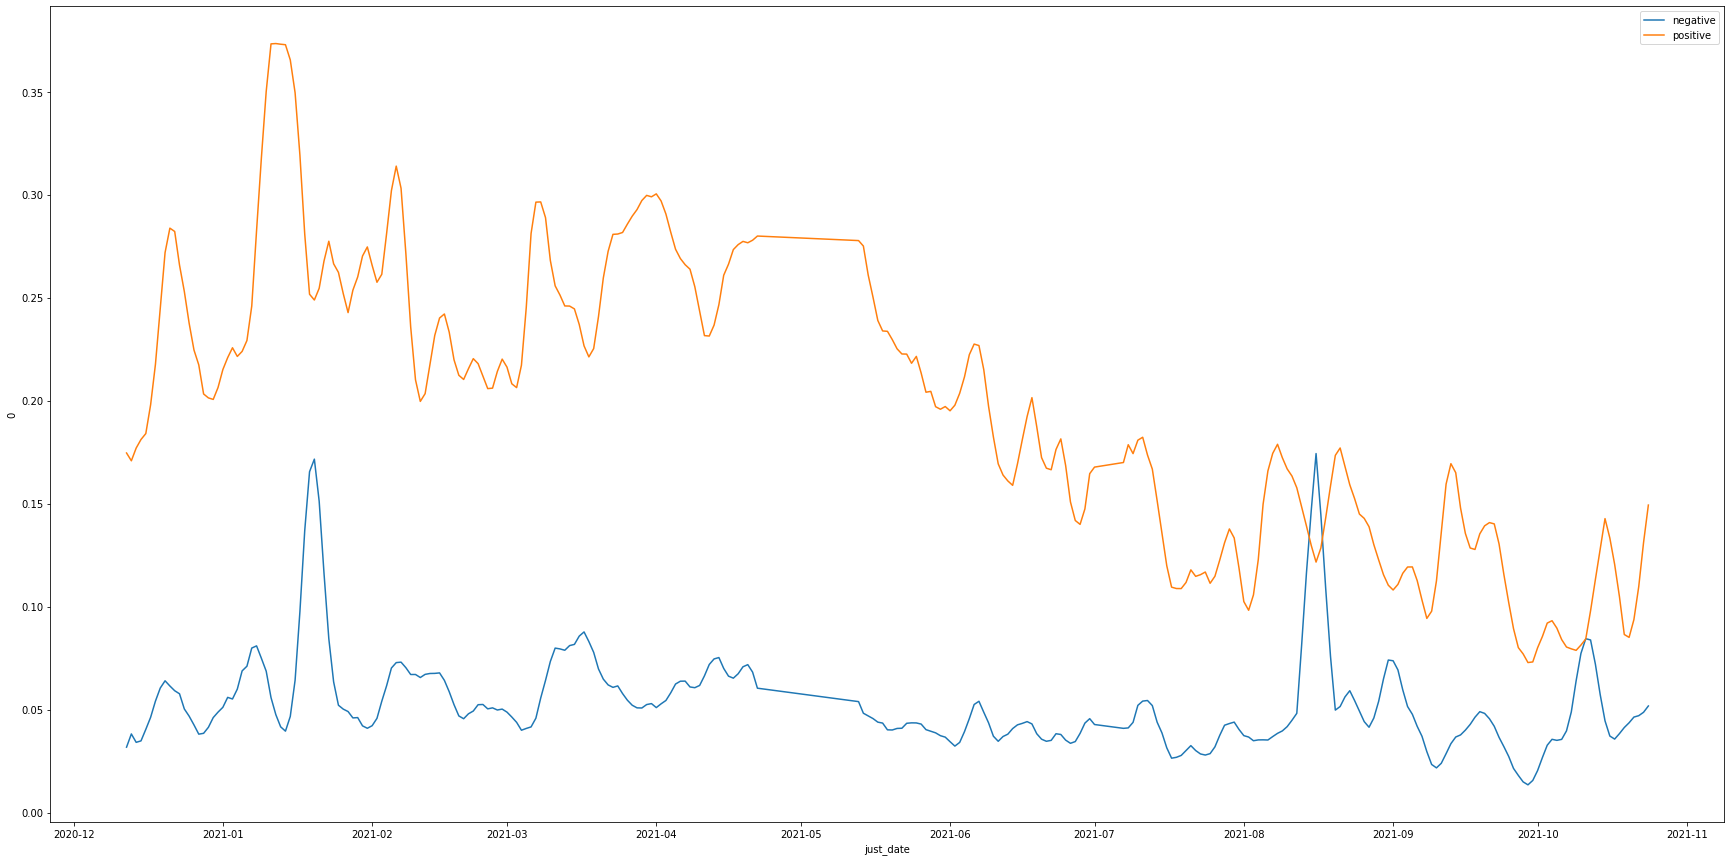

In [651]:
fig = plt.subplots(figsize=(30, 15))

sentiment_serie_normalized_rmean = sentiment_serie_normalized.rolling(7, min_periods = 1, win_type='triang').mean()
print(sentiment_serie_normalized_rmean)
#g = sns.lineplot(x=sentiment_serie.index, y=1,
#                 data=sentiment_serie, label="neutral")
g = sns.lineplot(x=sentiment_serie_normalized_rmean.index, y=0,
                 data=sentiment_serie_normalized_rmean, label="negative")
g = sns.lineplot(x=sentiment_serie_normalized_rmean.index, y=2,
                 data=sentiment_serie_normalized_rmean, label="positive")
plt.show()

label               0           1           2
just_date                                    
2020-12-12   2.000000   50.000000   11.000000
2020-12-13   3.000000   59.000000   12.666667
2020-12-14   2.833333   68.500000   15.666667
2020-12-15   3.300000   75.700000   18.000000
2020-12-16   4.538462   85.153846   20.769231
...               ...         ...         ...
2021-10-20  29.000000  562.312500   57.187500
2021-10-21  32.750000  591.312500   68.312500
2021-10-22  34.562500  611.375000   84.375000
2021-10-23  36.125000  615.375000  101.250000
2021-10-24  36.750000  603.562500  113.375000

[292 rows x 3 columns]


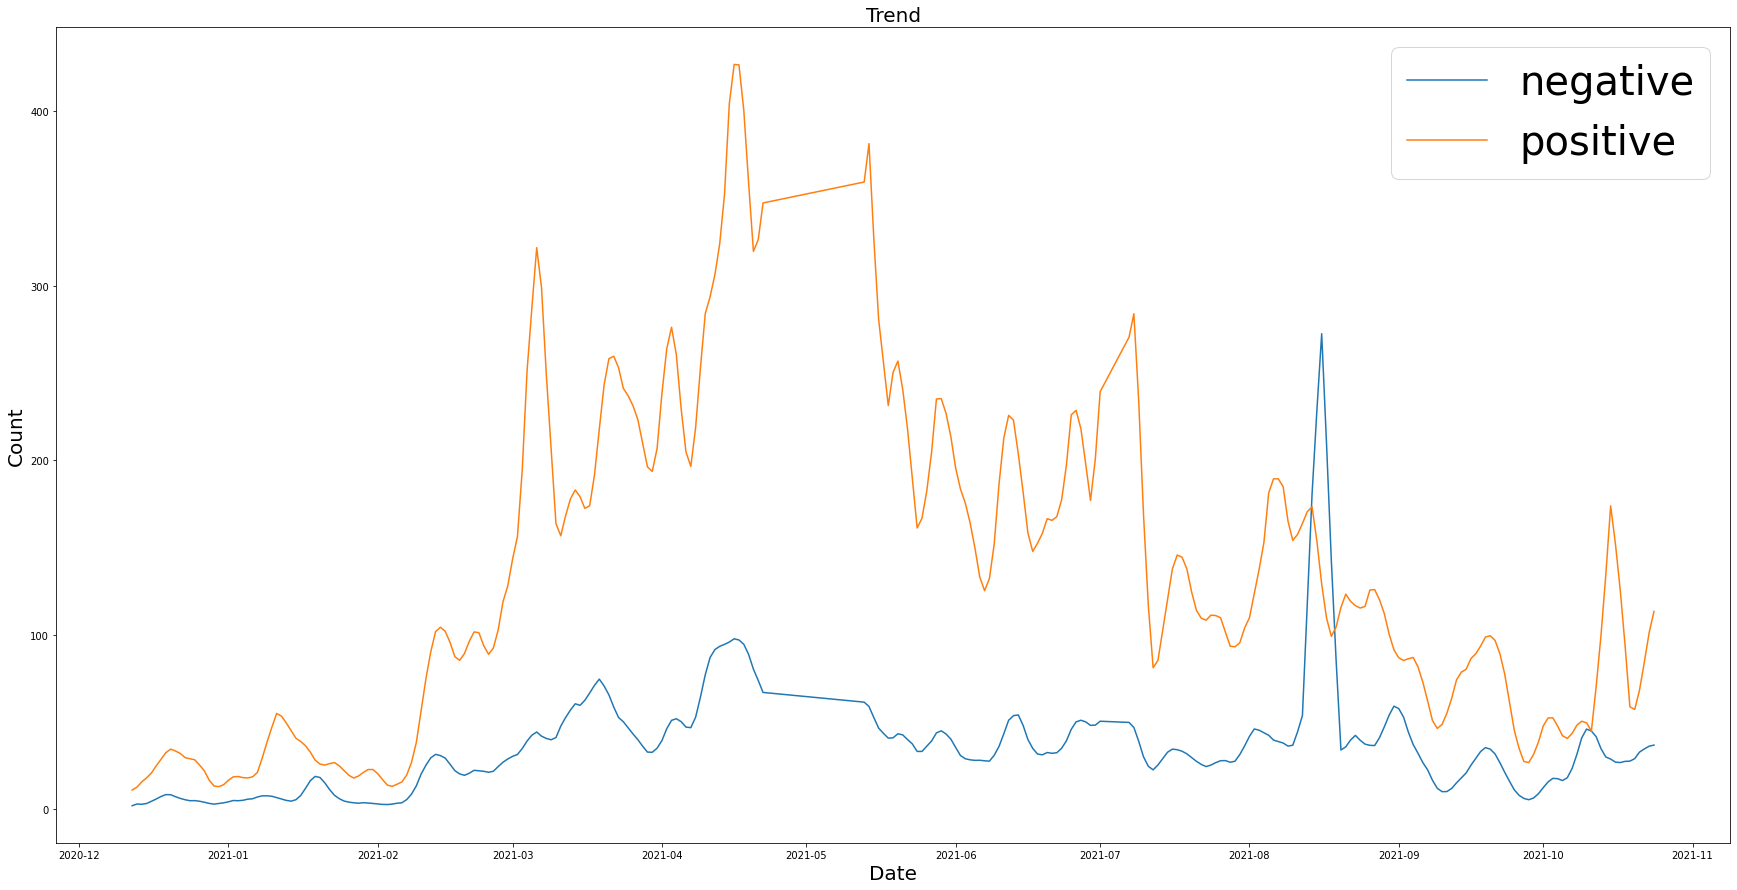

In [696]:
fig = plt.subplots(figsize=(30, 15))

sentiment_serie_rmean = sentiment_serie.rolling(7, min_periods = 1, win_type='triang').mean()
print(sentiment_serie_rmean)
#g = sns.lineplot(x=sentiment_serie.index, y=1,
#                 data=sentiment_serie, label="neutral")
g = sns.lineplot(x=sentiment_serie_rmean.index, y=0,
                 data=sentiment_serie_rmean, label="negative")
g = sns.lineplot(x=sentiment_serie_rmean.index, y=2,
                 data=sentiment_serie_rmean, label="positive")
g.set_title('Trend', fontsize=20)
g.set_xlabel('Date', fontsize=20)
g.set_ylabel('Count', fontsize=20)
plt.legend(fontsize='40', title_fontsize='40')
plt.savefig('sentiment_serie_rolling_count.png', bbox_inches='tight')
plt.show()

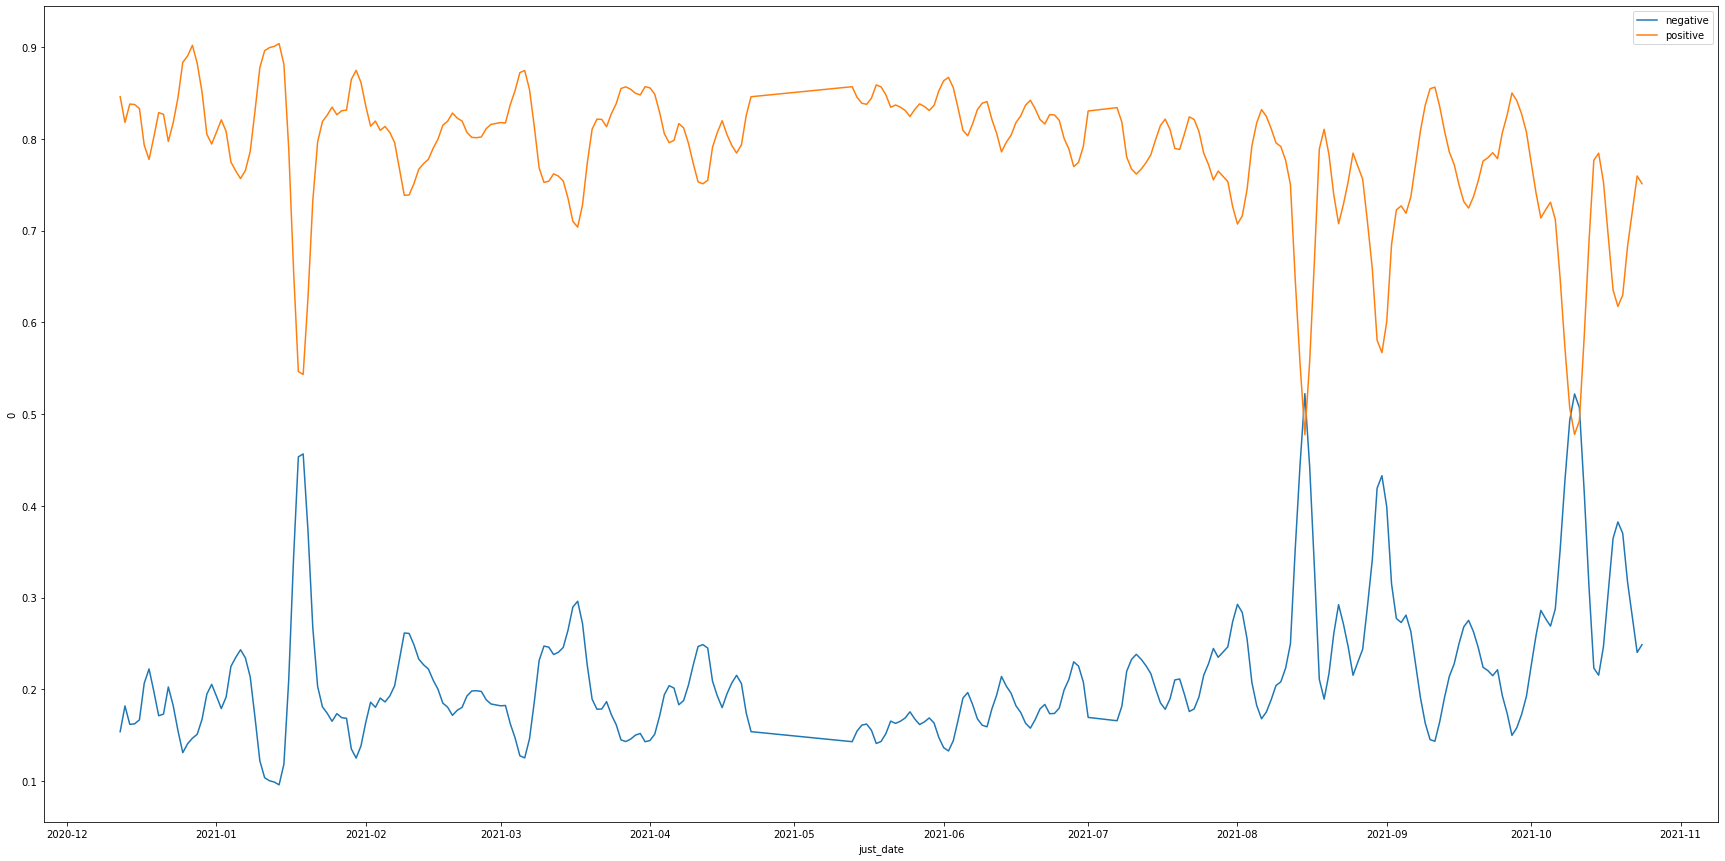

In [675]:
neutral_ignored = sentiment_serie.drop(columns=[1])
neutral_ignored_normalized = neutral_ignored.div(neutral_ignored.sum(axis=1), axis=0)
fig = plt.subplots(figsize=(30, 15))

neutral_ignored_normalized = neutral_ignored_normalized.rolling(5, min_periods = 1, win_type='triang').mean()
#print(sentiment_serie_rmean)
#g = sns.lineplot(x=sentiment_serie.index, y=1,
#                 data=sentiment_serie, label="neutral")
g = sns.lineplot(x=neutral_ignored_normalized.index, y=0,
                 data=neutral_ignored_normalized, label="negative")
g = sns.lineplot(x=neutral_ignored_normalized.index, y=2,
                 data=neutral_ignored_normalized, label="positive")
plt.show()

In [654]:
def autocorr(self, lag=1):
    """
    Lag-N autocorrelation

    Parameters
    ----------
    lag : int, default 1
        Number of lags to apply before performing autocorrelation.

    Returns
    -------
    autocorr : float
    """
    return self.corr(self.shift(lag))

In [655]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [676]:

#print(us_trend_rmean)
#print(cn_trend_rmean)
#print(neutral_ignored_normalized)
df = sentiment_serie_rmean.join(us_trend_rmean, how="outer")
df = df.rename(columns={FEATURE: 'us_daily'})
df = df.join(cn_trend_rmean, how="outer")
df = df.rename(columns={FEATURE: 'cn_daily'})
print(df)
df = df.interpolate()
df=df.dropna()

def get_period(df, start_date='2020-12-12', end_date='2021-10-24'):
    period = df[(df.index >= start_date)]
    period = period[(period.index <= end_date)]
    return period


                    0           1           2       us_daily  \
2020-12-12   2.000000   50.000000   11.000000            NaN   
2020-12-13   3.000000   59.000000   12.666667            NaN   
2020-12-14   2.833333   68.500000   15.666667            NaN   
2020-12-15   3.300000   75.700000   18.000000            NaN   
2020-12-16   4.538462   85.153846   20.769231            NaN   
...               ...         ...         ...            ...   
2021-10-20  29.000000  562.312500   57.187500  253164.428571   
2021-10-21  32.750000  591.312500   68.312500  234671.428571   
2021-10-22  34.562500  611.375000   84.375000  217765.285714   
2021-10-23  36.125000  615.375000  101.250000            NaN   
2021-10-24  36.750000  603.562500  113.375000            NaN   

            people_vaccinated_daily  
2020-12-12                      NaN  
2020-12-13                      NaN  
2020-12-14                      NaN  
2020-12-15                      0.0  
2020-12-16                      0.0  
...

In [683]:
#period = get_period(df, '2021-5-28', '2021-8-28')
period = get_period(df)

In [704]:
def plot_correlation(df, sentiment, vaccine_feature, lag_window):
    correlation = pd.DataFrame([crosscorr(df[sentiment], df[vaccine_feature], lag=i) for i in range(-lag_window,lag_window)])
    fig = plt.subplots(figsize=(30, 15))
    g = sns.lineplot(x = [i for i in range(-lag_window, lag_window)], y = correlation[0],
                     data=correlation, label="correlation")
    g.set_title('People Vaccinated Daily VS Negative Tweet Count', fontsize=20)
    g.set_xlabel('Time Lag', fontsize=20)
    g.set_ylabel('Coefficient', fontsize=20)
    plt.legend(fontsize='40', title_fontsize='40')
    plt.savefig('corr_Vaccine_Neg.png', bbox_inches='tight')
    plt.show()
    return correlation

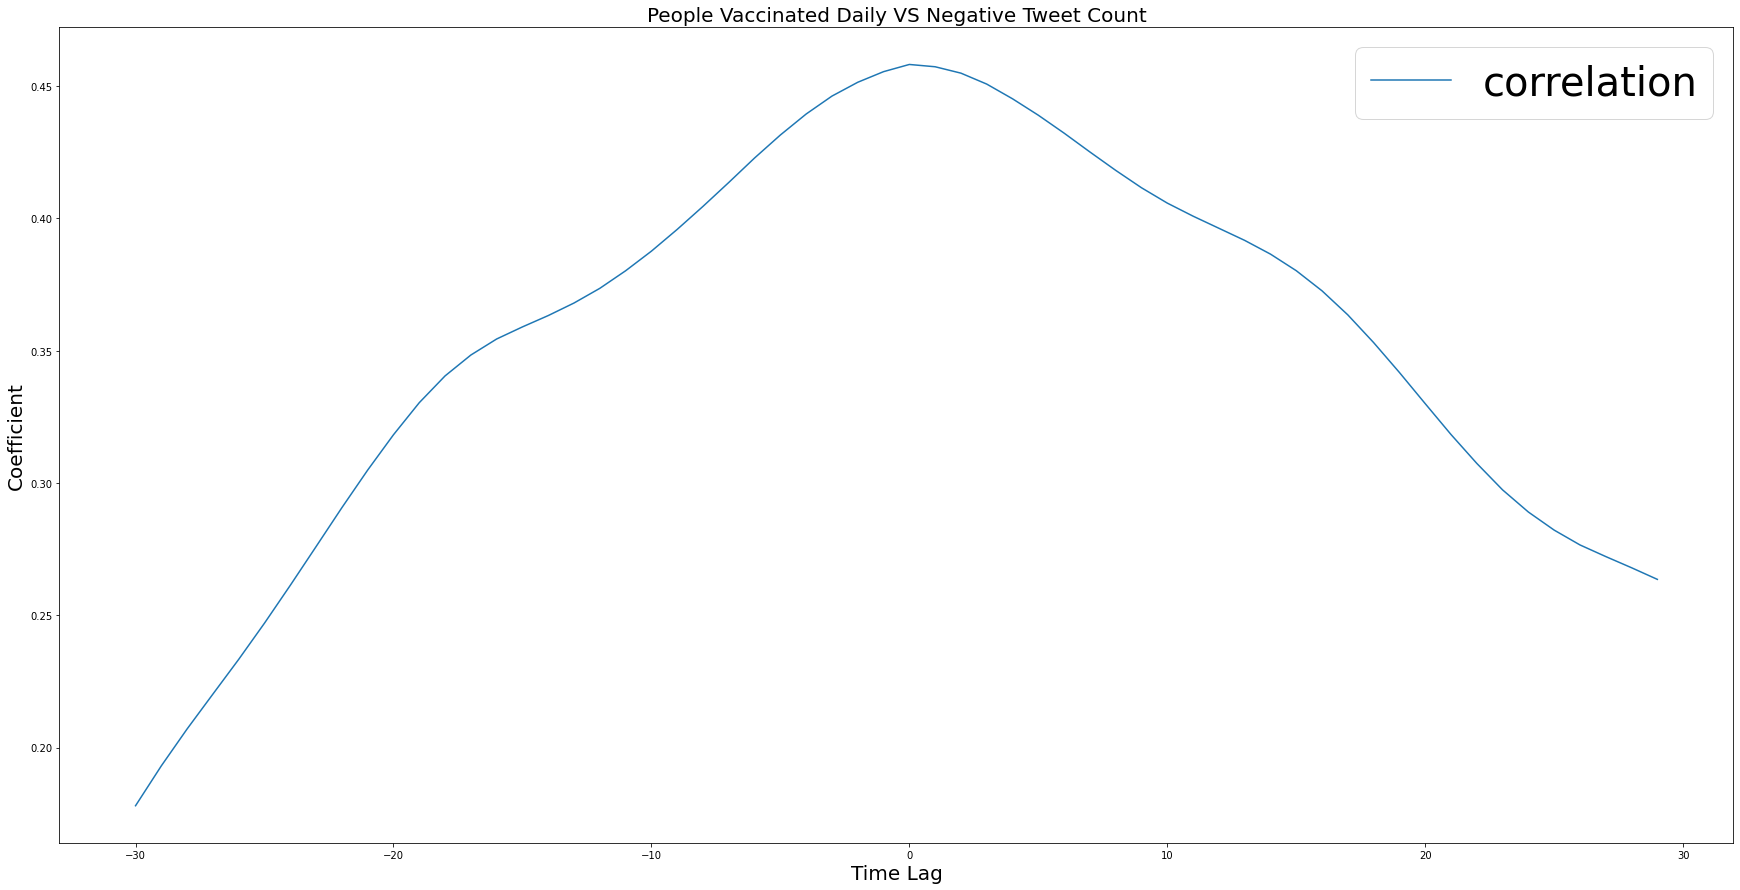

           0
0   0.177996
1   0.193079
2   0.207034
3   0.220213
4   0.233336
5   0.247028
6   0.261324
7   0.275967
8   0.290674
9   0.304884
10  0.318235
11  0.330359
12  0.340478
13  0.348373
14  0.354436
15  0.359006
16  0.363293
17  0.368041
18  0.373586
19  0.380224
20  0.387639
21  0.395868
22  0.404569
23  0.413610
24  0.422862
25  0.431552
26  0.439484
27  0.446261
28  0.451483
29  0.455494
30  0.458214
31  0.457345
32  0.454931
33  0.450796
34  0.445237
35  0.439029
36  0.432253
37  0.425134
38  0.418185
39  0.411607
40  0.405809
41  0.400870
42  0.396295
43  0.391714
44  0.386527
45  0.380257
46  0.372637
47  0.363544
48  0.353078
49  0.341775
50  0.329992
51  0.318325
52  0.307408
53  0.297393
54  0.289019
55  0.282186
56  0.276586
57  0.272187
58  0.267961
59  0.263566


In [705]:
corr = plot_correlation(period, 0, 'us_daily', 30)
print(corr)

           0
0   0.710064
1   0.834385
2   0.903920
3   0.857901
4   0.754223
5   0.670814
6   0.656130
7   0.740015
8   0.853437
9   0.910292
10  0.853798
11  0.740958
12  0.659178
13  0.643931
14  0.718931
15  0.821990
16  0.871067
17  0.815064
18  0.696722
19  0.617892
20  0.601165
21  0.660836
22  0.756609
23  0.804415
24  0.744850
25  0.636564
26  0.554726
27  0.548408
28  0.609537
29  0.697735
30  0.785250
31  0.677447
32  0.574000
33  0.489689
34  0.462864
35  0.519688
36  0.587413
37  0.624770
38  0.569594
39  0.472736
40  0.399294
41  0.381246
42  0.420456
43  0.501837
44  0.526170
45  0.470173
46  0.378751
47  0.295544
48  0.279583
49  0.317227
50  0.382726
51  0.409167
52  0.355158
53  0.267848
54  0.199344
55  0.190364
56  0.226046
57  0.301406
58  0.325662
59  0.269207


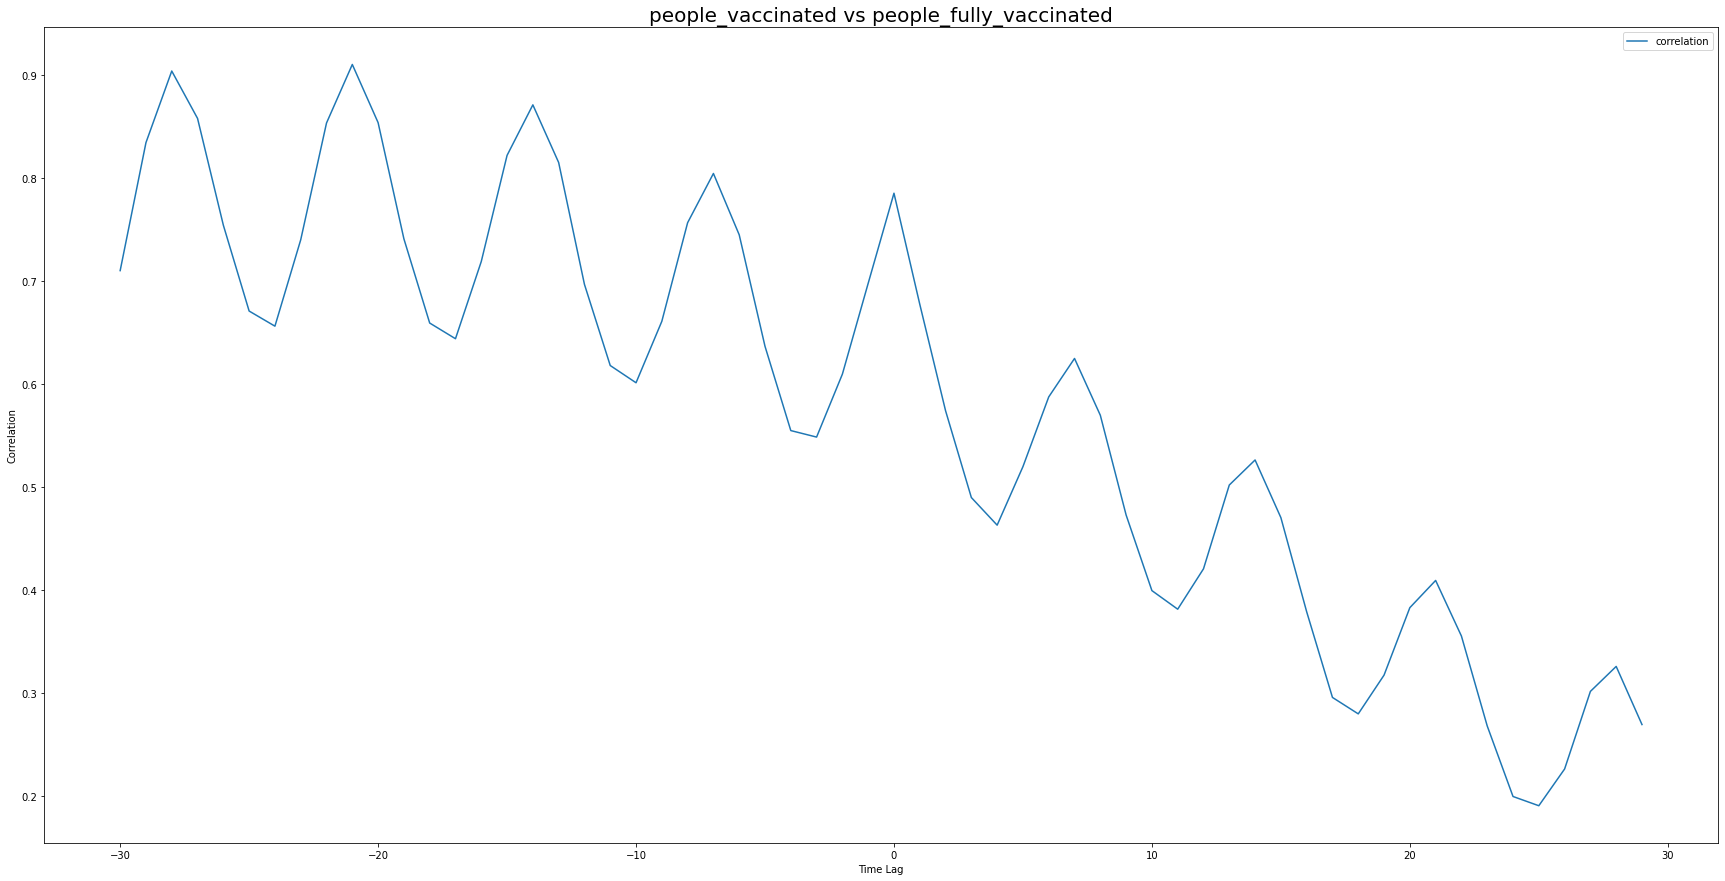

In [673]:
l1 = [3,2,1,1,2,3,4,5,6,7]
l2 = [1,2,3,3,2,1,1,2,3,4,5]
l1= pd.DataFrame(l1)
l2= pd.DataFrame(l2)


correlation = pd.DataFrame([crosscorr(US['people_vaccinated_daily'], US['people_fully_vaccinated_daily'], lag=i) for i in range(-30,30)])
print(correlation)
fig = plt.subplots(figsize=(30, 15))
g = sns.lineplot(x = [i for i in range(-30, 30)], y = correlation[0],
                 data=correlation, label="correlation")

g.set_title('people_vaccinated vs people_fully_vaccinated', fontsize=20)
g.set_xlabel('Time Lag')
g.set_ylabel('Correlation')
plt.savefig('corr_vaccinated_vs_fully.png', bbox_inches='tight')
plt.show()

In [661]:
US.head()

,Unnamed: 0,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,people_vaccinated_daily,people_vaccinated_per_hundred_daily
0,50317,USA,2020-12-20,556208.0,5.562080e+05,0.0,0.0,0.0,0.17,0.170000,0.0,0.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",NaN,NaN
1,50318,USA,2020-12-21,614117.0,6.141170e+05,0.0,57909.0,57909.0,0.18,0.180000,0.0,172.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",57909.000000,0.010000
2,50319,USA,2020-12-22,0.0,8.110710e+05,0.0,0.0,127432.0,0.00,0.240000,0.0,379.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",196954.000000,0.060000
3,50320,USA,2020-12-23,1008025.0,1.008025e+06,0.0,0.0,150606.0,0.30,0.300000,0.0,448.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",196954.000000,0.060000
4,50321,USA,2020-12-24,0.0,1.320212e+06,0.0,0.0,191001.0,0.00,0.393333,0.0,568.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",312186.666667,0.093333
